In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import scipy.spatial as spa
from numpy.linalg import matrix_power, eigh

In [2]:
N = np.array([50, 50, 50, 50, 100])

initial_means = np.array([[2.5, 2.5], [-2.5, 2.5], [-2.5, -2.5], [2.5, -2.5], [0, 0]])

variances = np.array([[[0.8, -0.6], [-0.6, 0.8]], [[0.8, 0.6], [0.6, 0.8]], [[0.8, -0.6], [-0.6, 0.8]], [[0.8, 0.6], [0.6, 0.8]], [[1.6, 0.0], [0.0, 1.6]]])

In [3]:
np.random.seed(521)
X1 = np.random.multivariate_normal(initial_means[0], variances[0], N[0])

X2 = np.random.multivariate_normal(initial_means[1], variances[1], N[1])

X3 = np.random.multivariate_normal(initial_means[2], variances[2], N[2])

X4 = np.random.multivariate_normal(initial_means[3], variances[3], N[3])

X5 = np.random.multivariate_normal(initial_means[4], variances[4], N[4])

X = np.concatenate((X1, X2, X3, X4, X5), axis = 0)

print(X.shape)

(300, 2)


Text(0, 0.5, '$X_{2}$')

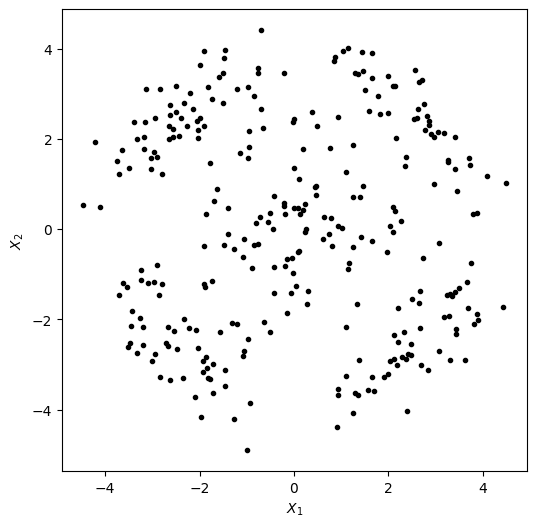

In [4]:
plt.figure(figsize = (6,6))
plt.plot(X[:, 0], X[:, 1], '.', color = "black")
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$")

In [5]:
threshold = 1.25 
distance_matrix = spa.distance_matrix(X,X)
distance_matrix[distance_matrix <= 1.25] = 1
distance_matrix[distance_matrix > 1.25] = 0
B = distance_matrix - np.eye(X.shape[0], X.shape[0])

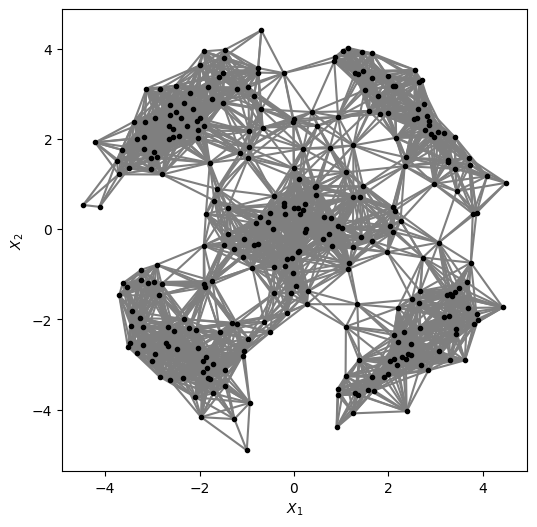

In [6]:
plt.figure(figsize = (6,6))


for i in range(X.shape[0]):
    
    for j in range(i + 1, X.shape[0]):
        
        if B[i][j] == 1: 
            
            a = (X[i, 0], X[j, 0])
            b = ((X[i, 1], X[j, 1]))
            
            plt.plot(a,b, color = "#7f7f7f")
plt.plot(X[:, 0], X[:, 1], '.', color = "black")
plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$")
plt.show()        

In [7]:
D = np.eye(B.shape[0], B.shape[0]) * np.sum(B, axis = 1)
L_symmetric_normalized = np.eye(B.shape[0], B.shape[0]) - np.matmul(np.sqrt(matrix_power(D,-1)), np.matmul(B, np.sqrt(matrix_power(D,-1))))

In [8]:
# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh(L_symmetric_normalized)

In [9]:
R = 5
Z = eigenvectors[:, 1:R + 1]
K = 5
print(Z)

[[ 0.00225332 -0.02970626  0.1215077  -0.05350856  0.05881185]
 [ 0.01934478 -0.01583822  0.0602155  -0.02464899 -0.12571926]
 [ 0.00694396 -0.02992297  0.12951246 -0.05271498 -0.05379749]
 ...
 [ 0.00067333 -0.00106953  0.03446799  0.06659001 -0.03322699]
 [-0.01344962  0.01237144  0.01390019  0.11784073  0.01399391]
 [-0.025202   -0.03167207  0.00258001  0.00728212  0.03877666]]


In [10]:
def update_memberships(x, centroids):
    
    D = spa.distance_matrix(centroids, x)
    
    return np.argmin(D, axis = 0)

def update_centroids(x, memberships):
    
    if memberships is None: 
        
        centroids = x[np.random.choice(range(N), K), :]
    
    else:
        
        centroids = np.vstack([np.mean(x[memberships == k, :], axis = 0) for k in range(K)])
        
    return centroids

In [11]:
centroid_indexes = [28, 142, 203, 270, 276]

centroids = Z[centroid_indexes]

print(centroids)

[[ 0.00325886 -0.03070096  0.12747516 -0.05551091  0.03543487]
 [-0.0342538   0.11685073 -0.02269928 -0.06127445 -0.00404365]
 [-0.01188869  0.03876559 -0.00024575  0.04717368  0.01128642]
 [-0.01512635  0.03295704  0.00463725  0.08546651  0.01848106]
 [ 0.00092625  0.02155608  0.00332934  0.07374296  0.01282762]]


In [12]:
memberships = update_memberships(Z, centroids)
old_memberships= None
iteration = 0 

while True: 
    
    if np.array_equal(memberships, old_memberships):
        
        break
        
    else:
        
        old_memberships = memberships
        centroids = update_centroids(Z, memberships)
        memberships = update_memberships(Z, centroids)
        iteration += 1

print(f"Completed at #{iteration} iteration")
centroids = update_centroids(X, memberships)

Completed at #3 iteration


Text(0, 0.5, '$X_{2}$')

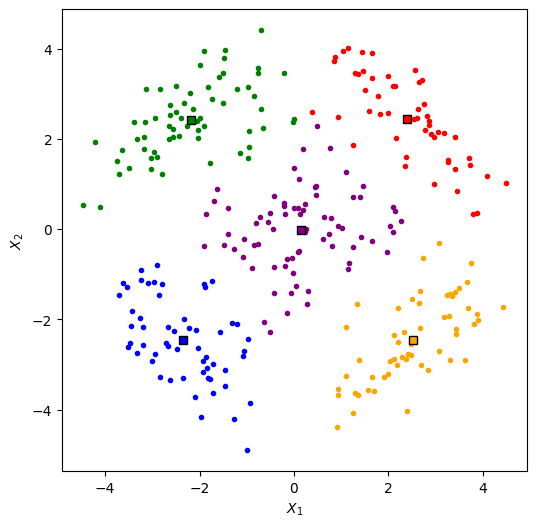

In [13]:
plt.figure(figsize = (6,6))
cluster_colors = ["red", "blue", "green", "purple", "orange"]

for k in range(K):
    
    plt.plot(X[memberships == k, 0], X[memberships == k, 1], ".", color = cluster_colors[k])
    
    plt.plot(centroids[k, 0], centroids[k, 1], "s" ,color = cluster_colors[k], markeredgecolor = "black")

plt.xlabel("$X_{1}$")
plt.ylabel("$X_{2}$")